<a href="https://colab.research.google.com/github/yasmine-sassi/Insurance-Claim-Prediction/blob/main/insurance_claim_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report, log_loss, f1_score, recall_score

from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization

from xgboost import plot_importance

In [ ]:
df = pd.read_csv('insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df['_c39'].unique()

array([nan])

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
fraud_values = df['fraud_reported'].value_counts().values

In [ ]:
fraud_keys = df['fraud_reported'].value_counts().keys()

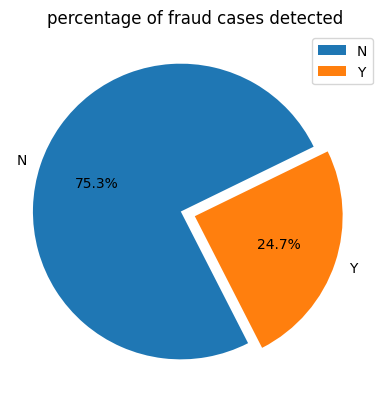

In [ ]:
plt.pie(fraud_values, labels=fraud_keys, autopct='%.1f%%', startangle=26, explode=[.1, 0])
plt.legend()
plt.title('percentage of fraud cases detected')
plt.show()

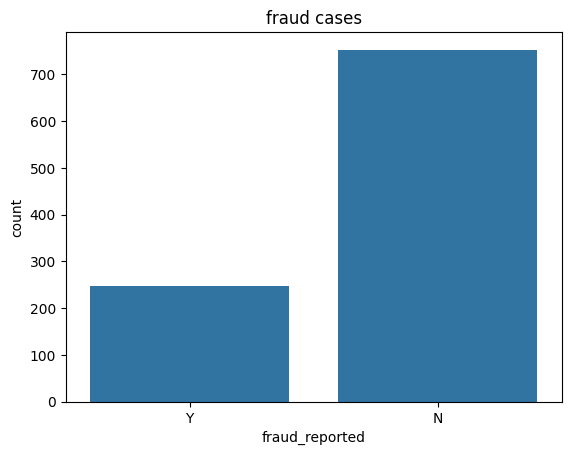

In [ ]:
sns.countplot(data=df, x='fraud_reported')
plt.title('fraud cases')
plt.show()

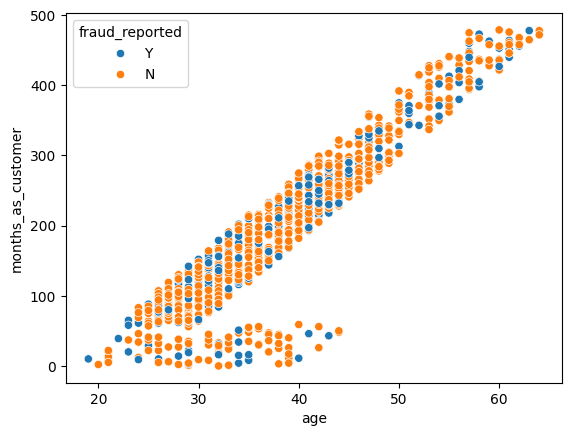

In [ ]:
sns.scatterplot(data=df, x='age', y='months_as_customer', hue='fraud_reported')
plt.show()

<Axes: >

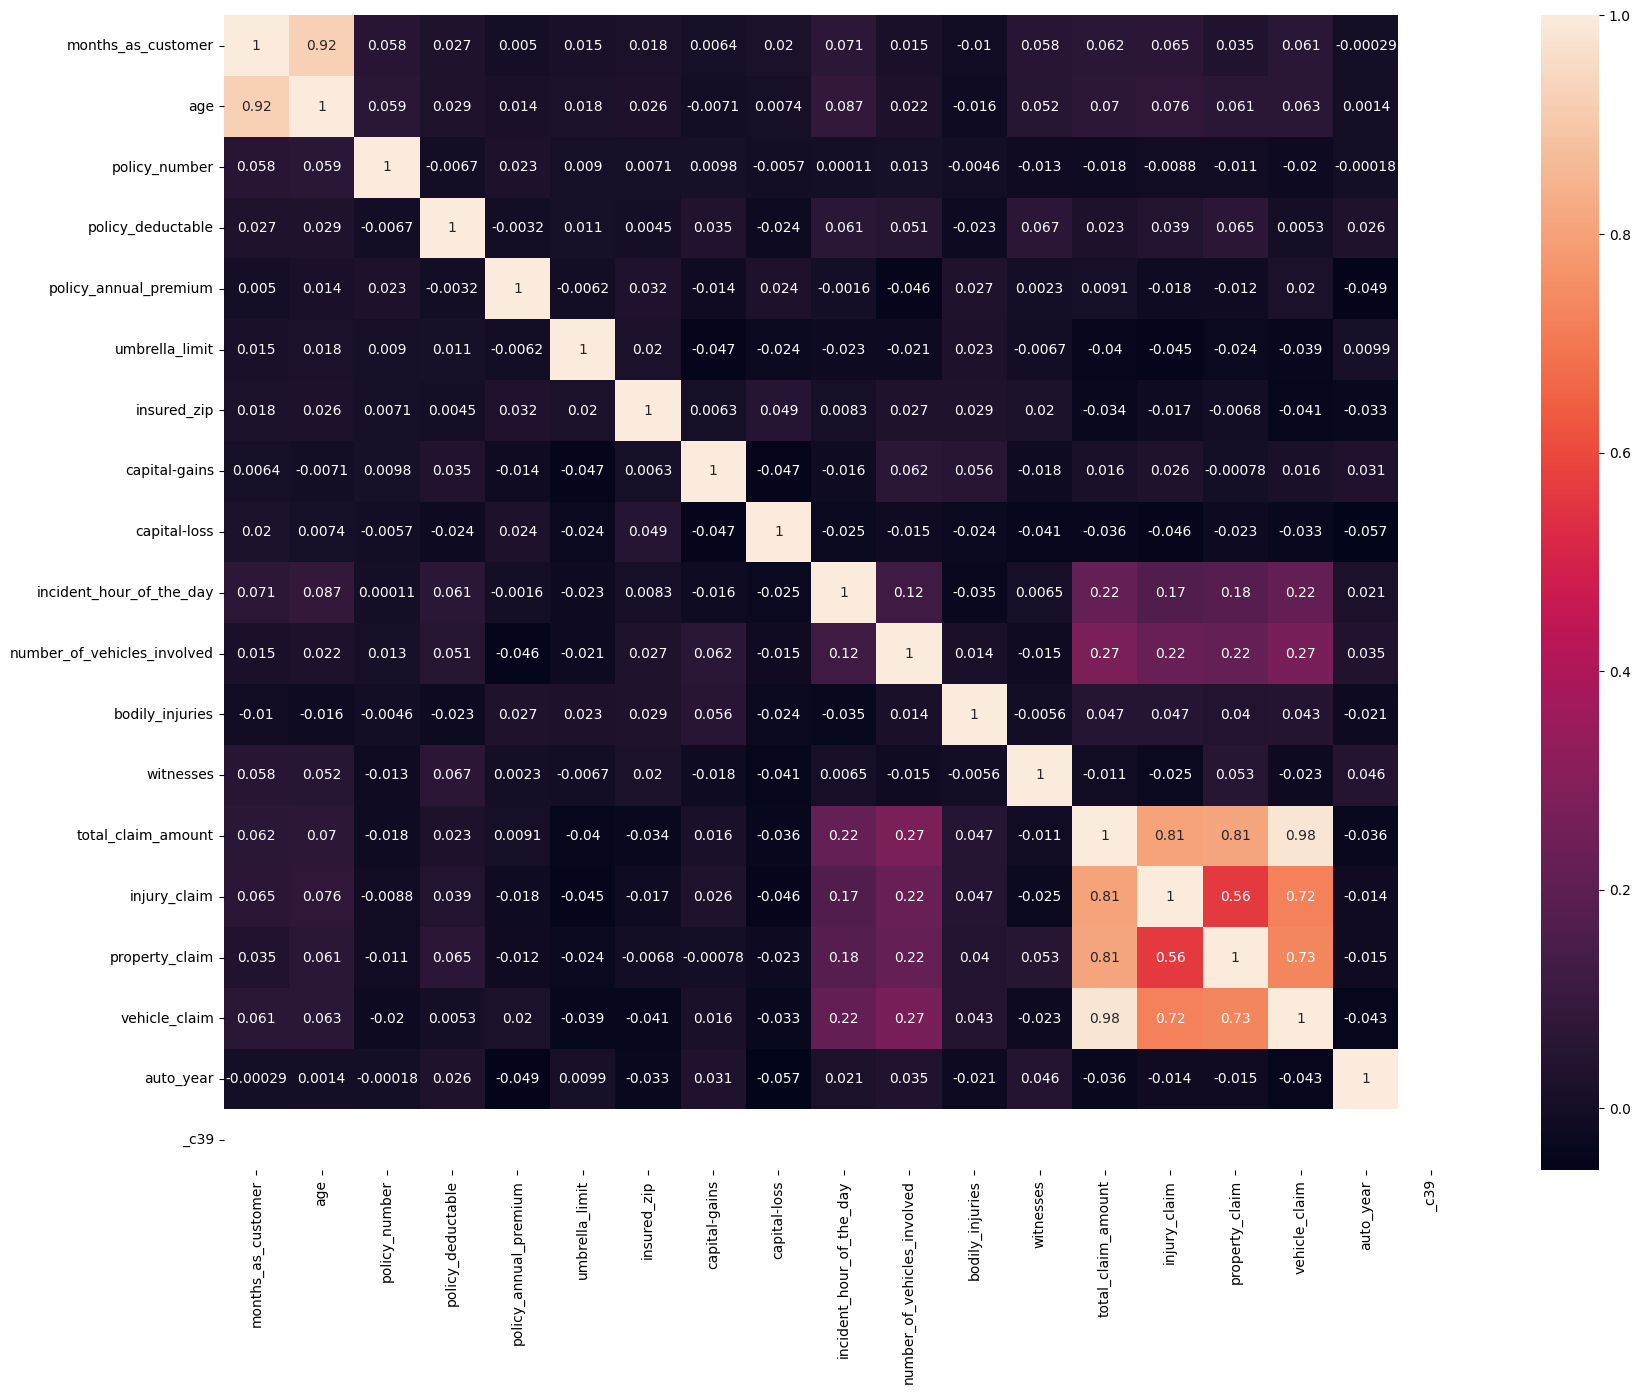

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='age', ylabel='Count'>

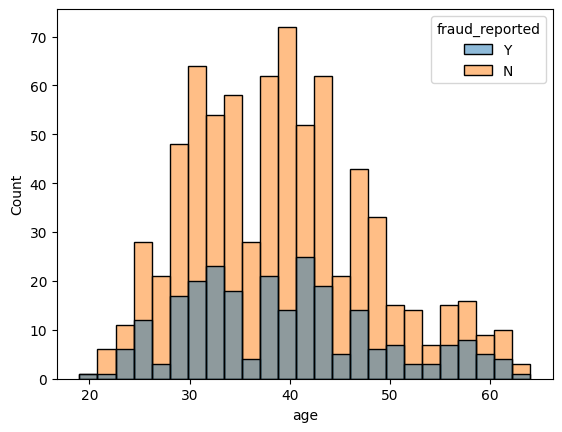

In [ ]:
sns.histplot(data=df, x='age', bins=25, hue='fraud_reported')

<Axes: ylabel='Density'>

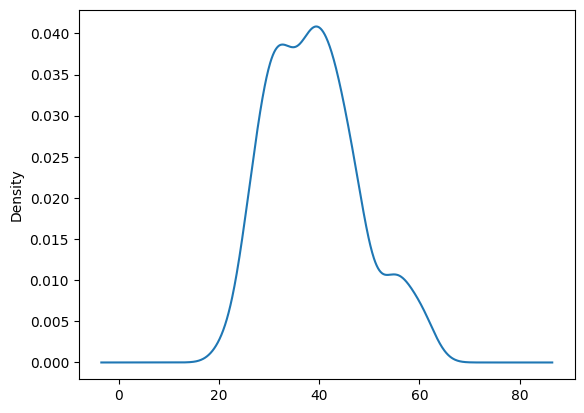

In [ ]:
df['age'].plot.kde()

In [ ]:
df.groupby('fraud_reported').agg(value=('age', 'mean'))

,value
fraud_reported,
N,38.884462
Y,39.141700


In [ ]:
df.groupby('fraud_reported')['insured_sex'].value_counts().to_frame()

count
fraud_reported insured_sex       
N              FEMALE         411
               MALE           342
Y              FEMALE         126
               MALE           121

In [ ]:
df.groupby('fraud_reported').agg(value=('total_claim_amount', 'median'))

,value
fraud_reported,
N,56520.0
Y,61290.0


In [ ]:
df.groupby('fraud_reported').agg(value=('policy_state', 'max'))

,value
fraud_reported,
N,OH
Y,OH


In [ ]:
df_hobbies_per_fraud = df.groupby('fraud_reported')['insured_hobbies'].value_counts().to_frame().reset_index()

<Axes: xlabel='insured_hobbies', ylabel='count'>

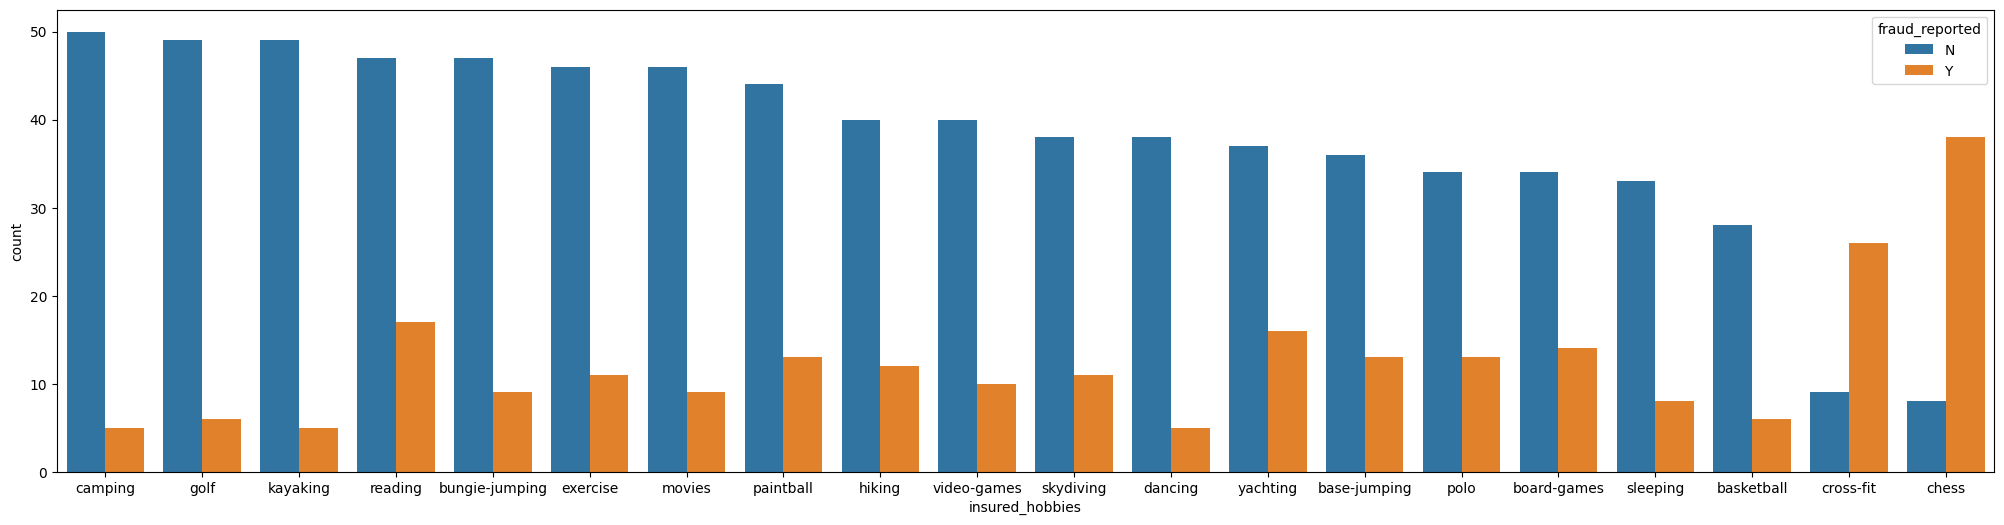

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(data=df_hobbies_per_fraud,x='insured_hobbies', y='count', hue='fraud_reported')

fraud_reported
N    Axes(0.125,0.11;0.775x0.77)
Y    Axes(0.125,0.11;0.775x0.77)
dtype: object

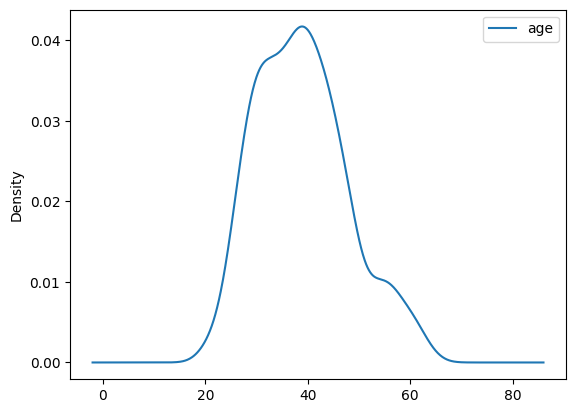

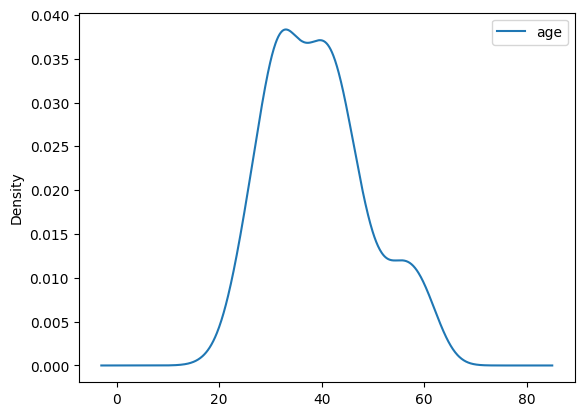

In [ ]:
df[['age', 'fraud_reported']].groupby('fraud_reported').plot.kde()

<Axes: ylabel='Density'>

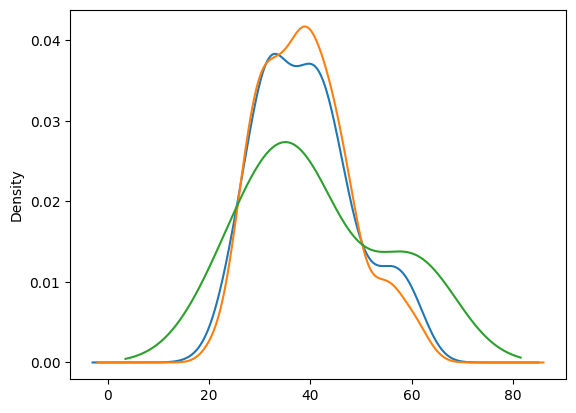

In [ ]:
df.loc[df['fraud_reported']=='Y', 'age'].plot.kde()
df.loc[df['fraud_reported']!='Y', 'age'].plot.kde()
df.loc[10:20, 'age'].plot.kde()

In [ ]:
df.loc[10:20,['police_report_available', 'total_claim_amount']]

,police_report_available,total_claim_amount
10,?,87010
11,YES,114920
12,NO,56520
13,NO,7280
14,YES,46200
15,NO,63120
16,YES,52110
17,YES,77880
18,NO,72930
19,NO,60400


In [ ]:
df['age'].quantile([.13,.5,.75])

0.13    29.0
0.50    38.0
0.75    44.0
Name: age, dtype: float64

In [ ]:
df['age'].describe()

count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='policy_annual_premium'>

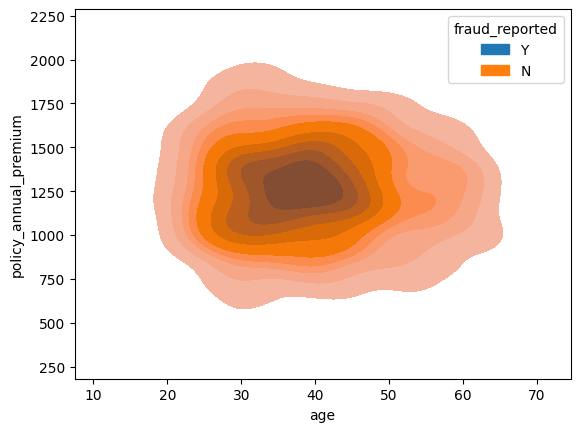

In [ ]:
sns.kdeplot(
    data=df, x="age", y="policy_annual_premium", hue="fraud_reported", fill=True,
)

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

fraud_reported
N    Axes(0.125,0.11;0.775x0.77)
Y    Axes(0.125,0.11;0.775x0.77)
dtype: object

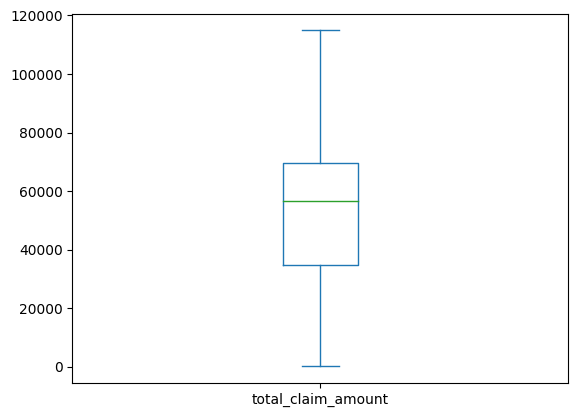

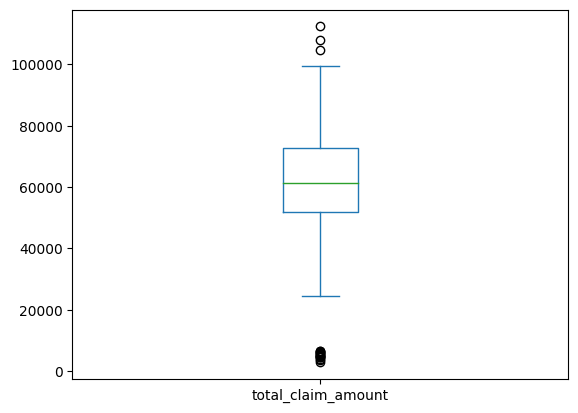

In [ ]:
df[['total_claim_amount', 'fraud_reported']].groupby('fraud_reported').plot.box()

In [ ]:
df.loc[((zscore(df['total_claim_amount'])<-2)|(zscore(df['total_claim_amount'])>2)&(df['fraud_reported']=='N')), 'total_claim_amount']

11     114920
565    108030
718    105820
996    108480
Name: total_claim_amount, dtype: int64

In [ ]:
df['total_claim_amount'].quantile([.99])

0.99    101018.5
Name: total_claim_amount, dtype: float64

Data preprocessing

column drop

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
df['_c39'].value_counts(dropna=False)

_c39
NaN    1000
Name: count, dtype: int64

In [ ]:
df.drop(columns=['_c39', 'policy_number', 'insured_zip', 'incident_location'],inplace=True)

In [ ]:
pd.crosstab([df['police_report_available'],df['incident_severity']], df['authorities_contacted'])

authorities_contacted                      Ambulance  Fire  Other  Police
police_report_available incident_severity                                
?                       Major Damage              26    28     25      26
                        Minor Damage              21    28     19      36
                        Total Loss                22    21     29      19
                        Trivial Damage             0     0      0      16
NO                      Major Damage              29    26     20      16
                        Minor Damage              21    28     16      33
                        Total Loss                24    23     20      27
                        Trivial Damage             0     0      0      24
YES                     Major Damage              15    28     21      16
                        Minor Damage              20    20     20      42
                        Total Loss                18    21     28      28
                        Trivial Damage             0     0      0       9

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,FEMALE,Masters,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,FEMALE,PhD,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df['authorities_contacted'].value_counts(dropna=False)

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NaN           91
Name: count, dtype: int64

In [ ]:
df.loc[df['authorities_contacted'].isna(), 'authorities_contacted'] = 'no authorities contacted'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [ ]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['police_report_available'], df['fraud_reported'])

fraud_reported,N,Y
police_report_available,,
?,254,89
NO,257,86
YES,242,72


In [ ]:
df.loc[df['police_report_available']=='?', 'police_report_available'] = 'Unknown'

In [ ]:
df['duration_incident_bind']= (pd.to_datetime(df['incident_date']) - pd.to_datetime(df['policy_bind_date'])).dt.days//30

In [ ]:
df = df.drop(columns=['incident_date', 'policy_bind_date'])

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
column_list=[]
for column in df.columns:
  if not df.loc[df[column]=='?'].empty:
    column_list.append(column)

In [ ]:
for column in column_list:
  print(pd.crosstab(df[column], df['fraud_reported']))

fraud_reported     N   Y
collision_type          
?                162  16
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70
fraud_reported     N    Y
property_damage          
?                257  103
NO               272   66
YES              224   78


In [ ]:
for column in column_list:
  df.loc[df[column]=='?', column]='Unknown'

In [ ]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,duration_incident_bind
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,104
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,176
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,299
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,no authorities contacted,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,8


In [ ]:
categorical_columns=['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit',
                     'insured_sex','insured_education_level', 'insured_occupation',
                     'insured_hobbies', 'insured_relationship','incident_type',
                     'collision_type',	'incident_severity',	'authorities_contacted',
                     'incident_state',	'incident_city', 'number_of_vehicles_involved',
                     'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
                     'auto_make', 'auto_model', 'fraud_reported', 'incident_hour_of_the_day']

In [ ]:
numerical_columns = list(set(df.columns) - set(categorical_columns))

In [ ]:
df[categorical_columns]

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,fraud_reported,incident_hour_of_the_day
0,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,Saab,92x,Y,5
1,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,1,Unknown,0,0,Unknown,Mercedes,E400,Y,8
2,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,Dodge,RAM,N,7
3,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,Unknown,1,2,NO,Chevrolet,Tahoe,Y,5
4,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Unknown,Minor Damage,no authorities contacted,NY,Arlington,1,NO,0,1,NO,Accura,RSX,N,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,0,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,1,YES,0,1,Unknown,Honda,Accord,N,20
996,IL,100/300,1000,0,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,1,YES,2,3,Unknown,Volkswagen,Passat,N,23
997,OH,250/500,500,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,3,Unknown,2,3,YES,Suburu,Impreza,N,4
998,IL,500/1000,2000,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,1,Unknown,0,1,YES,Audi,A5,N,2


In [ ]:
df['auto_year'].value_counts()

auto_year
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: count, dtype: int64

In [ ]:
scaler=StandardScaler()
scaler.fit(df[['age','months_as_customer']])
df[['age','months_as_customer']]=scaler.transform(df[['age','months_as_customer']])


In [ ]:
df[['age','months_as_customer']].corr()

,age,months_as_customer
age,1.000000,0.922098
months_as_customer,0.922098,1.000000


In [ ]:
pca = PCA(n_components=1)
df['months_as_customer_age']=pca.fit_transform(df[['age','months_as_customer']])

In [ ]:
df.drop(columns=['age','months_as_customer'],inplace=True)

In [ ]:
df

,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,duration_incident_bind,months_as_customer_age
0,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3,1.462987
1,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,104,0.384007
2,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,176,-1.199900
3,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,299,0.478689
4,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,no authorities contacted,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,8,0.538808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,287,-1.308395
996,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,0.656916
997,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Unknown,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,145,-0.837482
998,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Unknown,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,39,3.345542


In [ ]:
scaler=StandardScaler()
scaler.fit(df[['injury_claim','property_claim','vehicle_claim','total_claim_amount']])
df[['injury_claim','property_claim','vehicle_claim','total_claim_amount']]\
=scaler.transform(df[['injury_claim','property_claim','vehicle_claim','total_claim_amount']])

In [ ]:
df[['injury_claim','property_claim','vehicle_claim','total_claim_amount']].corr()

,injury_claim,property_claim,vehicle_claim,total_claim_amount
injury_claim,1.000000,0.563866,0.722878,0.805025
property_claim,0.563866,1.000000,0.732090,0.810686
vehicle_claim,0.722878,0.732090,1.000000,0.982773
total_claim_amount,0.805025,0.810686,0.982773,1.000000


In [ ]:
pca = PCA(n_components=0.8)
df["claims"]=pca.fit_transform(df[['injury_claim','property_claim','vehicle_claim','total_claim_amount']])

In [ ]:
df['claims']

0      1.235020
1     -3.205904
2     -1.100694
3      0.365978
4     -3.110865
         ...   
995    2.426704
996    4.142898
997    0.722085
998   -0.578723
999   -3.218291
Name: claims, Length: 1000, dtype: float64

In [ ]:
df.drop(columns=['injury_claim','property_claim','vehicle_claim','total_claim_amount'],inplace= True)

In [ ]:
df

,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,duration_incident_bind,months_as_customer_age,claims
0,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,Saab,92x,2004,Y,3,1.462987,1.235020
1,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,Unknown,Mercedes,E400,2007,Y,104,0.384007,-3.205904
2,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,Dodge,RAM,2007,N,176,-1.199900,-1.100694
3,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Unknown,1,2,NO,Chevrolet,Tahoe,2014,Y,299,0.478689,0.365978
4,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,no authorities contacted,NY,Arlington,20,1,NO,0,1,NO,Accura,RSX,2009,N,8,0.538808,-3.110865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,Unknown,Honda,Accord,2006,N,287,-1.308395,2.426704
996,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,Unknown,Volkswagen,Passat,2015,N,12,0.656916,4.142898
997,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Unknown,2,3,YES,Suburu,Impreza,1996,N,145,-0.837482,0.722085
998,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Unknown,0,1,YES,Audi,A5,1998,N,39,3.345542,-0.578723


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_state                 1000 non-null   object 
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [ ]:
df.corr(numeric_only=True)

,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,auto_year,duration_incident_bind,months_as_customer_age,claims
policy_deductable,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.026105,0.050329,0.028559,0.034843
policy_annual_premium,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,-0.049226,-0.001384,0.009906,0.001034
umbrella_limit,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,0.009893,-0.046234,0.017150,-0.040703
capital-gains,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.031398,-0.042234,-0.000345,0.015691
capital-loss,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.056615,0.027787,0.014065,-0.037660
incident_hour_of_the_day,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.021368,-0.035800,0.080483,0.214682
number_of_vehicles_involved,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.034554,-0.025286,0.018789,0.272025
bodily_injuries,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,-0.020527,-0.028982,-0.013180,0.048675
witnesses,0.066639,0.002332,-0.006738,-0.017651,-0.041330,0.006527,-0.014669,-0.005606,1.000000,0.045791,-0.056649,0.056482,-0.002617
auto_year,0.026105,-0.049226,0.009893,0.031398,-0.056615,0.021368,0.034554,-0.020527,0.045791,1.000000,-0.014101,0.000541,-0.030101


In [ ]:
numerical_columns = list(set(df.columns) - set(categorical_columns))

In [ ]:
numerical_columns

['capital-gains',
 'claims',
 'auto_year',
 'capital-loss',
 'policy_annual_premium',
 'duration_incident_bind',
 'months_as_customer_age']

In [ ]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

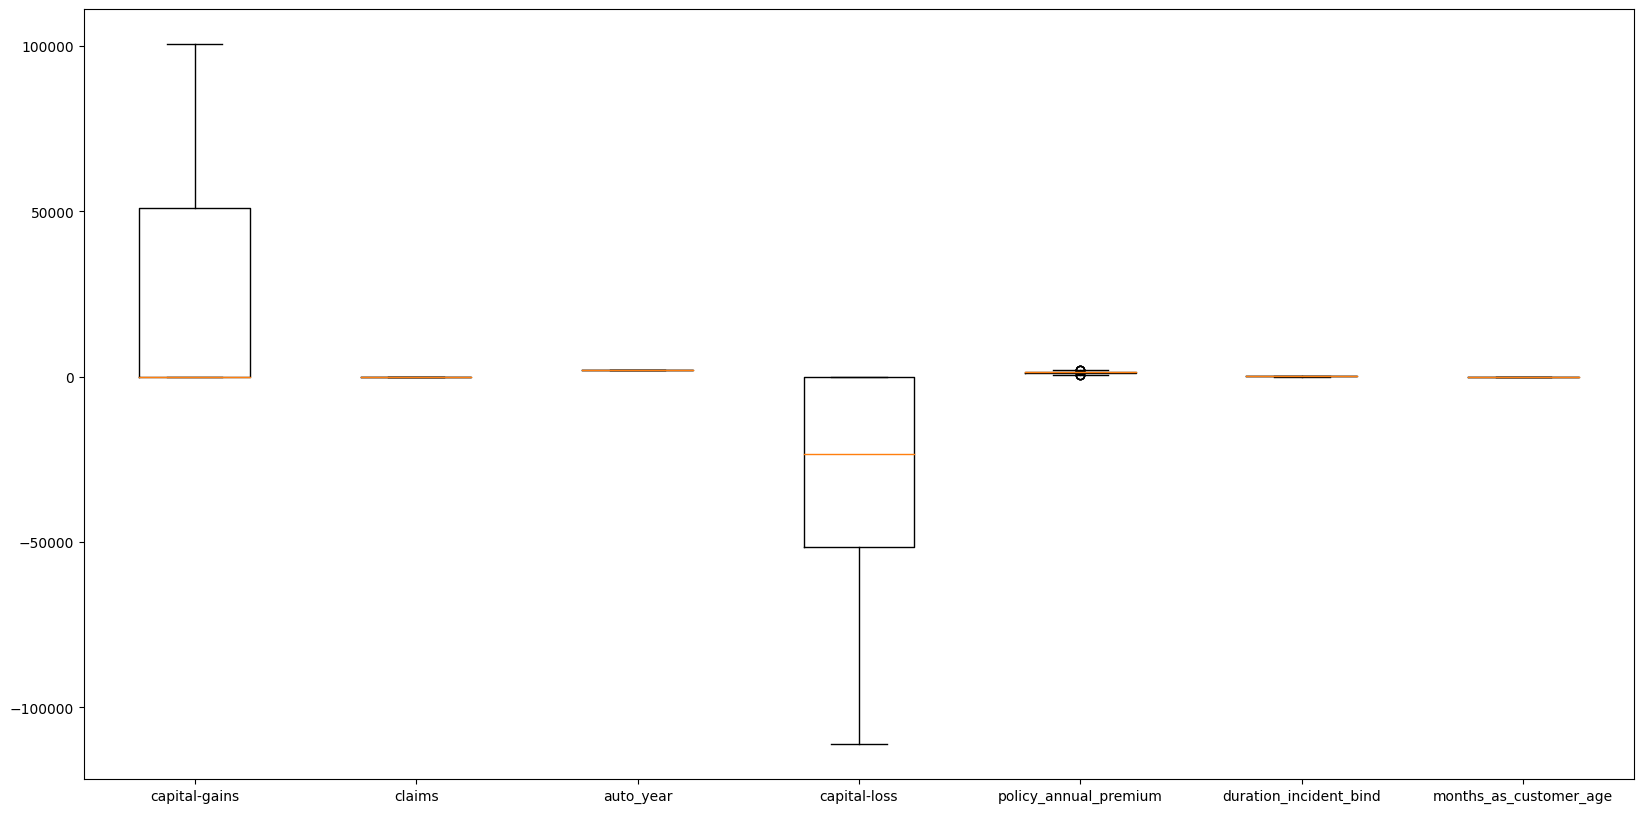

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(df[numerical_columns], labels=numerical_columns)
plt.show()

In [ ]:
df['capital-gains'].value_counts()

capital-gains
0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: count, Length: 338, dtype: int64

In [ ]:
df[['capital-gains','capital-loss']].corr()

,capital-gains,capital-loss
capital-gains,1.000000,-0.046904
capital-loss,-0.046904,1.000000


In [ ]:
pd.DataFrame(scaler.fit_transform(df.loc[(df['capital-gains']>0)&(df['capital-loss']<0),\
                            ['capital-loss','capital-gains']])).corr()

,0,1
0,1.000000,-0.027467
1,-0.027467,1.000000


In [ ]:
df.columns

Index(['policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'duration_incident_bind', 'months_as_customer_age',
       'claims'],
      dtype='object')

In [ ]:
scaler=StandardScaler()
scaler.fit(df[['capital-loss','capital-gains']])
df[['capital-loss','capital-gains']]=scaler.transform(df[['capital-loss','capital-gains']])

In [ ]:
scaler=StandardScaler()
scaler.fit(df[['policy_annual_premium','auto_year','duration_incident_bind']])
df[['policy_annual_premium','auto_year','duration_incident_bind']]\
=scaler.transform(df[['policy_annual_premium','auto_year','duration_incident_bind']])

In [ ]:
scaler=RobustScaler()
scaler.fit(df[['policy_annual_premium']])
df[['policy_annual_premium']]=scaler.transform(df[['policy_annual_premium']])

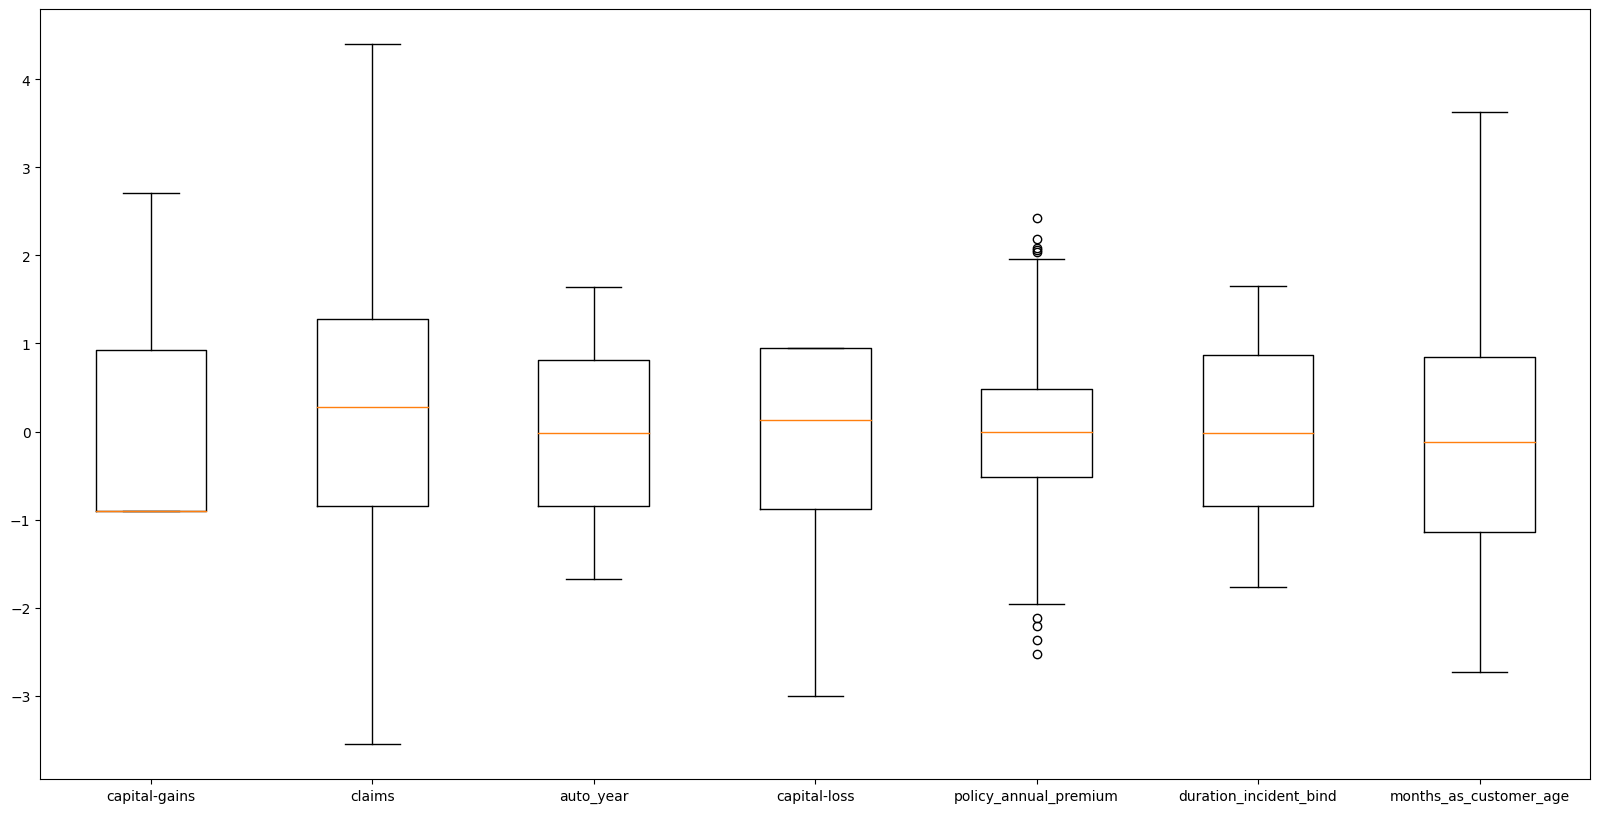

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(df[numerical_columns], labels=numerical_columns)
plt.show()

In [ ]:
df= df.loc[(df['policy_annual_premium']>-2)&(df['policy_annual_premium']<2)]

In [ ]:
df

,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,duration_incident_bind,months_as_customer_age,claims
0,OH,250/500,1000,0.459110,0,MALE,MD,craft-repair,sleeping,husband,1.011331,0.953851,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,Saab,92x,-0.183440,Y,-1.726487,1.462987,1.235020
1,IN,250/500,2000,-0.183938,5000000,MALE,MD,machine-op-inspct,reading,other-relative,-0.901927,0.953851,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,Unknown,Mercedes,E400,0.315491,Y,-0.597852,0.384007,-3.205904
2,OH,100/300,2000,0.478215,5000000,FEMALE,PhD,sales,board-games,own-child,0.358023,0.953851,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,Dodge,RAM,0.315491,N,0.206719,-1.199900,-1.100694
3,IL,250/500,2000,0.486189,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,0.853388,-1.267577,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Unknown,1,2,NO,Chevrolet,Tahoe,1.479664,Y,1.581194,0.478689,0.365978
4,IL,500/1000,1000,1.001909,6000000,MALE,Associate,sales,board-games,unmarried,1.467210,-0.683741,Vehicle Theft,Unknown,Minor Damage,no authorities contacted,NY,Arlington,20,1,NO,0,1,NO,Accura,RSX,0.648112,N,-1.670614,0.538808,-3.110865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,0.164373,0,FEMALE,Masters,craft-repair,paintball,unmarried,-0.901927,0.953851,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,Unknown,Honda,Accord,0.149180,N,1.447099,-1.308395,2.426704
996,IL,100/300,1000,0.550742,0,FEMALE,PhD,prof-specialty,sleeping,wife,1.643100,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,Unknown,Volkswagen,Passat,1.645974,N,-1.625915,0.656916,4.142898
997,OH,250/500,500,0.387289,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,0.358023,0.953851,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Unknown,2,3,YES,Suburu,Impreza,-1.513924,N,-0.139694,-0.837482,0.722085
998,IL,500/1000,2000,0.305807,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,-0.901927,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Unknown,0,1,YES,Audi,A5,-1.181303,N,-1.324201,3.345542,-0.578723


In [ ]:
categorical_columns.remove('fraud_reported')
for column in categorical_columns:
  df[column], _ = pd.factorize(df[column])

<ipython-input-81-03abcd864e11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column], _ = pd.factorize(df[column])
<ipython-input-81-03abcd864e11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column], _ = pd.factorize(df[column])
<ipython-input-81-03abcd864e11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
df['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)

<ipython-input-82-a57b63656a5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_state                 991 non-null    int64  
 1   policy_csl                   991 non-null    int64  
 2   policy_deductable            991 non-null    int64  
 3   policy_annual_premium        991 non-null    float64
 4   umbrella_limit               991 non-null    int64  
 5   insured_sex                  991 non-null    int64  
 6   insured_education_level      991 non-null    int64  
 7   insured_occupation           991 non-null    int64  
 8   insured_hobbies              991 non-null    int64  
 9   insured_relationship         991 non-null    int64  
 10  capital-gains                991 non-null    float64
 11  capital-loss                 991 non-null    float64
 12  incident_type                991 non-null    int64  
 13  collision_type           

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fraud_reported']), df['fraud_reported'], test_size=0.2, random_state=42, stratify=df['fraud_reported'])

In [ ]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote =sm.fit_resample(X_train, y_train)

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
class_weights

array([0.66331658, 2.03076923])

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
clf = RandomForestClassifier(n_estimators=100,max_depth=30, min_samples_split=2, min_samples_leaf=20, max_features=30)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=30, max_features=30, min_samples_leaf=20)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6683417085427136

In [ ]:
confusion_matrix(y_test, y_pred)

array([[118,  32],
       [ 34,  15]])

<Figure size 2000x1000 with 0 Axes>

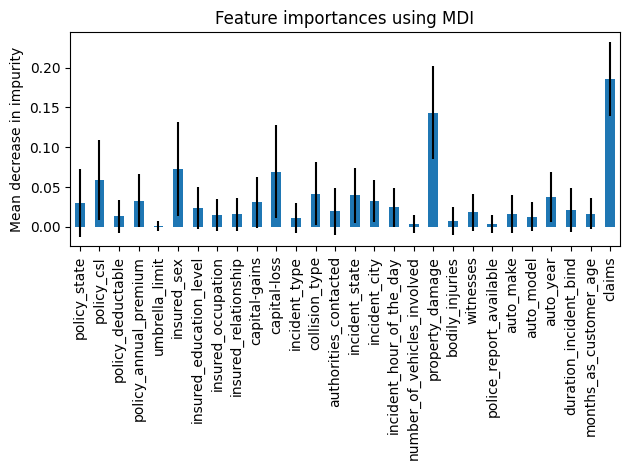

In [ ]:
plt.figure(figsize=(20,10))
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.drop(columns=\
 ['fraud_reported','incident_severity', 'insured_hobbies']).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
pd.crosstab(X_train_smote['incident_severity'], y_train_smote)

fraud_reported,0,1
incident_severity,,
0,88,436
1,255,87
2,188,68
3,66,6


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       150
           1       0.62      0.82      0.71        49

    accuracy                           0.83       199
   macro avg       0.78      0.83      0.80       199
weighted avg       0.86      0.83      0.84       199



In [ ]:
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
threshold=.485

In [ ]:
predicted = (y_pred_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

In [ ]:
accuracy

0.6582914572864321

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       150
           1       0.32      0.35      0.33        49

    accuracy                           0.66       199
   macro avg       0.55      0.55      0.55       199
weighted avg       0.67      0.66      0.66       199



In [ ]:
log_loss(y_test,y_pred_proba)

0.6004986457846945

In [ ]:
c1 = pd.Series([x[1] for x in y_pred_proba])
c2 = pd.Series(y_pred)
df_pred = pd.DataFrame(data=[c1, c2]).T

In [ ]:
df_pred.columns=['proba', 'prediction']

In [ ]:
df_pred

,proba,prediction
0,0.630842,1.0
1,0.511569,1.0
2,0.510076,1.0
3,0.269334,0.0
4,0.308804,0.0
...,...,...
194,0.095306,0.0
195,0.416831,0.0
196,0.489198,0.0
197,0.299083,0.0


In [ ]:
df_pred.loc[df_pred['prediction']==0, 'proba']

3      0.269334
4      0.308804
5      0.453123
6      0.119089
7      0.490001
         ...   
194    0.095306
195    0.416831
196    0.489198
197    0.299083
198    0.343544
Name: proba, Length: 152, dtype: float64

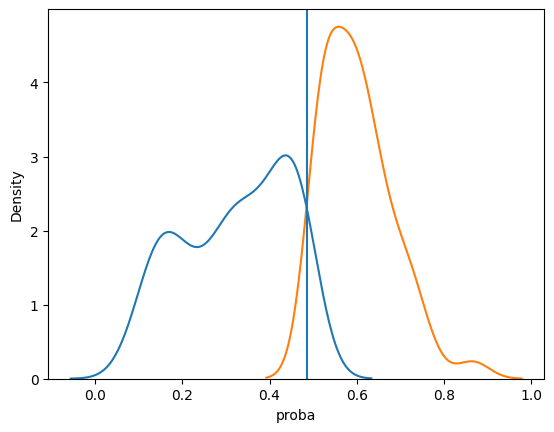

In [ ]:
x=.44
sns.kdeplot(df_pred.loc[df_pred['prediction']==0, 'proba'])
ax = sns.kdeplot(df_pred.loc[df_pred['prediction']==1, 'proba'])
ax.axvline(x = .485,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 5)

In [ ]:
parameters = {'n_estimators':[100, 300, 400, 600],'max_depth':[20,30, 40], 'min_samples_split':[2, 3, 4], \
              'min_samples_leaf':[10, 15, 20], 'max_features':[5, 10, 20]}

In [ ]:
rf = RandomForestClassifier()
gsc = GridSearchCV(rf, parameters, scoring='recall')
gsc.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 400, 600]},
             scoring='recall')

In [ ]:
gsc.best_params_

{'max_depth': 40,
 'max_features': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
gsc.best_score_

0.7430672268907564

In [ ]:
y_pred = gsc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[117,  33],
       [ 36,  13]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       150
           1       0.28      0.27      0.27        49

    accuracy                           0.65       199
   macro avg       0.52      0.52      0.52       199
weighted avg       0.65      0.65      0.65       199



In [ ]:
clf_gsc = RandomForestClassifier(**gsc.best_params_)
clf_gsc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=40, max_features=20, min_samples_leaf=10,
                       min_samples_split=4)

<Figure size 2000x1000 with 0 Axes>

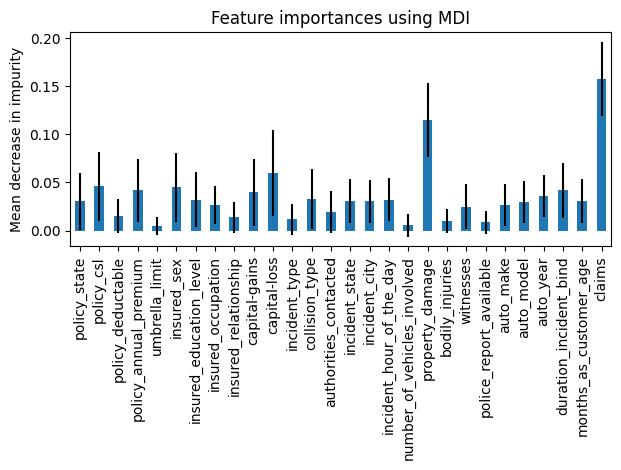

In [ ]:
plt.figure(figsize=(20,10))
importances = clf_gsc.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_gsc.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.drop(columns=\
 ['fraud_reported','incident_severity', 'insured_hobbies']).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
def prediction(n_estimators,max_depth, min_samples_split, min_samples_leaf,max_features):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = RandomForestClassifier(n_estimators=int(n_estimators),\
                                         max_depth=int(max_depth),\
                                         min_samples_split=int(min_samples_split),\
                                         min_samples_leaf=int(min_samples_leaf),\
                                         max_features=int(max_features))
  clf_iteration.fit(X_train_smote, y_train_smote)
  y_pred_iteration = clf_iteration.predict(X_test)
  return recall_score(y_test, y_pred_iteration)

In [ ]:
pbounds = {'n_estimators':(100, 600),'max_depth':(10,40), 'min_samples_split':(2, 30), \
              'min_samples_leaf':(3, 20), 'max_features':(5, 30)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = prediction,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 80)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.3265    | 39.01     | 18.68     | 19.54     | 22.01     | 448.9     |
| 2         | 0.2653    | 16.48     | 29.41     | 3.106     | 9.084     | 317.4     |
| 3         | 0.2857    | 33.38     | 9.942     | 17.67     | 29.54     | 181.9     |
| 4         | 0.2653    | 27.92     | 5.225     | 9.572     | 3.236     | 578.3     |
| 5         | 0.3061    | 23.08     | 28.72     | 16.37     | 26.26     | 186.6     |
| 6         | 0.2857    | 39.12     | 15.57     | 17.17     | 22.49     | 449.3     |
| 7         | 0.2653    | 27.5      | 14.55     | 6.798     | 26.41     | 405.1     |
| 8         | 0.3469    | 17.53     | 27.78     | 19.31     | 16.08     | 446.3     |
| 9         | 0.3469    | 15.72     | 27.83     | 14.7      | 14.64     | 210.1     |
| 10        | 0.2857    | 29.46     | 10.81     | 11.9

In [ ]:
clf_outliers = IsolationForest(n_estimators= 400, max_features=20, max_samples=.9)
clf_outliers.fit(X_train)

IsolationForest(max_features=20, max_samples=0.9, n_estimators=400)

In [ ]:
y_test_outlier = y_test.copy()
y_test_outlier.replace({0: -1}, inplace=True)

In [ ]:
y_pred_outliers = clf_outliers.predict(X_test)

In [ ]:
accuracy_score(y_test_outlier, y_pred_outliers)

0.7135678391959799

In [ ]:
confusion_matrix(y_test_outlier, y_pred_outliers)

array([[138,  12],
       [ 45,   4]])

In [ ]:
y_pred_outliers

array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1])

In [ ]:
y_test_outlier.value_counts()

fraud_reported
-1    150
 1     49
Name: count, dtype: int64

In [ ]:
def prediction_xgb(n_estimators,max_depth, max_leaves, learning_rate):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = XGBClassifier(n_estimators=int(n_estimators),\
                                         max_depth=int(max_depth),\
                                         max_leaves=int(max_leaves),\
                                         learning_rate=learning_rate)
  clf_iteration.fit(X_train_smote.drop(columns='insured_hobbies'), y_train_smote)
  y_pred_iteration = clf_iteration.predict(X_test.drop(columns='insured_hobbies'))
  return recall_score(y_test, y_pred_iteration)

In [ ]:
pbounds = {'n_estimators':(100, 600),'max_depth':(10,70), 'max_leaves':(2, 15), \
              'learning_rate':(.001, .01)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = prediction_xgb,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 20, n_iter = 40)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | learni... | max_depth | max_le... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.6939    | 0.009703  | 42.83     | 14.64     | 457.4     |
| 2         | 0.7959    | 0.00728   | 22.97     | 14.69     | 103.1     |
| 3         | 0.7755    | 0.003277  | 36.09     | 12.13     | 198.8     |
| 4         | 0.7755    | 0.008767  | 69.0      | 4.13      | 398.7     |
| 5         | 0.7959    | 0.001081  | 33.19     | 2.574     | 578.3     |
| 6         | 0.7755    | 0.004925  | 66.94     | 12.22     | 533.1     |
| 7         | 0.7551    | 0.002558  | 14.5      | 9.81      | 184.0     |
| 8         | 0.7143    | 0.0076    | 34.51     | 8.863     | 568.8     |
| 9         | 0.7959    | 0.005695  | 16.49     | 4.057     | 372.6     |
| 10        | 0.7959    | 0.00572   | 48.26     | 7.219     | 424.9     |
| 11        | 0.7755    | 0.004572  | 47.43     | 11.98     | 189.5     |
| 12        | 0.7959    | 0.00438   | 

In [ ]:
xgb_classifier = XGBClassifier(n_estimators=int(103.11512760229493),\
                                         max_depth=int(22.96536973482258),\
                                         max_leaves=int(14.691567912091143),\
                                         learning_rate=0.007279559421375438)
xgb_classifier.fit(X_train_smote.drop(columns='insured_hobbies'), y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.007279559421375438,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=14,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=103, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test.drop(columns='insured_hobbies'))

In [ ]:
accuracy_score(y_test, y_pred_xgb)

0.8391959798994975

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       150
           1       0.64      0.80      0.71        49

    accuracy                           0.84       199
   macro avg       0.78      0.82      0.80       199
weighted avg       0.86      0.84      0.84       199



In [ ]:
confusion_matrix(y_test, y_pred_xgb)

array([[128,  22],
       [ 10,  39]])

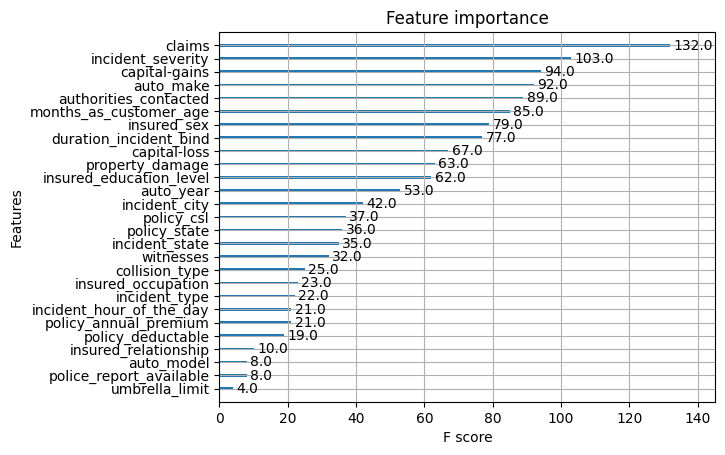

In [ ]:
plot_importance(xgb_classifier)
plt.show()